## Homework 2: NBA Player Salaries 

**Objective**: Perform some basic data analysis techniques using pandas, numpy, seaborn, and matplotlib. Our goal is to complete data analysis on two csv files that contain NBA salaries and performance. Note that you might have to go online to look up some pandas concepts.

**General Note**: You may need to convert values from strings to integers/float, then back to strings.

**Questions**: 

0.) You have two csv files, "players.csv" and "salaries_1985to2018.csv". Read in both as two different dataframes. Merge them based on player name (hint: you have to rename one of the columns). We will be using this dataframe for the following questions. 

1.) Make a line plot of the average salaries by season. Are they increasing over time?

2.) Make a line plot of the average weight by season. Is weight increasing over time?

3.) Compute the average salary for each draft pick round. Are there any trends? 

4.) Take your merged dataframe. Divide the players heights into 2 inch buckets, starting at 6'0. So 6'0 - 6'2, 6'2 - 6'4. Plot a histogram of the buckets. What does the average salary look like per bucket? Heights are stored as a string. This might result in weird behavior when sorting. You may need to convert to inches as an integer, then convert back to strings when plotting. Optional helper function is given below.

5.) Group by player_id and make a scatter plot of the average career FG% vs e_FG%. Notice anything weird? You may need to convert strings to float values.

6.) Group by player_id again, and make a scatter plot of average career FG% vs career FT%. 

In [483]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [484]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [485]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker

In [486]:
# Question 4 helper function 
# helper function to convert feet-inches strings to inches
def feet_inches_to_inches(height_str):
    feet, inches = map(int, height_str.split('-'))
    return feet * 12 + inches


Question 0 Solution:

In [487]:
df_player = pd.read_csv('players.csv')
df_salary = pd.read_csv('salaries_1985to2018.csv')

df_player.rename(columns={'_id': 'player_id'}, inplace=True)
df_merged = pd.merge(df_player, df_salary, on='player_id')

#print(df_merged.head())


Question 1 Solution:

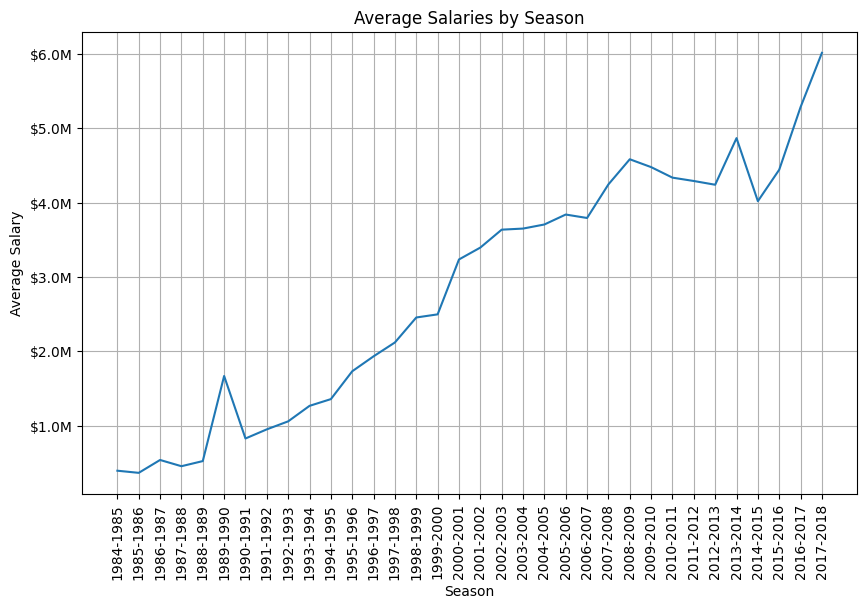

In [488]:
unique_season= df_merged['season_start'].unique()

average_salary_dict = dict()
for season in unique_season:
    people_with_this_job = df_merged[df_merged['season_start'] == season]
    average_salary_dict[season] = people_with_this_job['salary'].mean()

sorted_keys = sorted(average_salary_dict.keys())
sorted_values = [average_salary_dict[key] for key in sorted_keys]

formatted_years = [f"{year}-{year+1}" for year in sorted_keys]

plt.figure(figsize=(10, 6))
plt.plot(formatted_years, sorted_values)
plt.xticks(ticks=formatted_years, labels=formatted_years, rotation=90)
plt.xlabel('Season')
plt.ylabel('Average Salary')

formatter = ticker.FuncFormatter(lambda x, pos: f"${x/1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Average Salaries by Season')
plt.grid(True)
plt.show()

Average salaries increase over time.

Question 2 Solution:

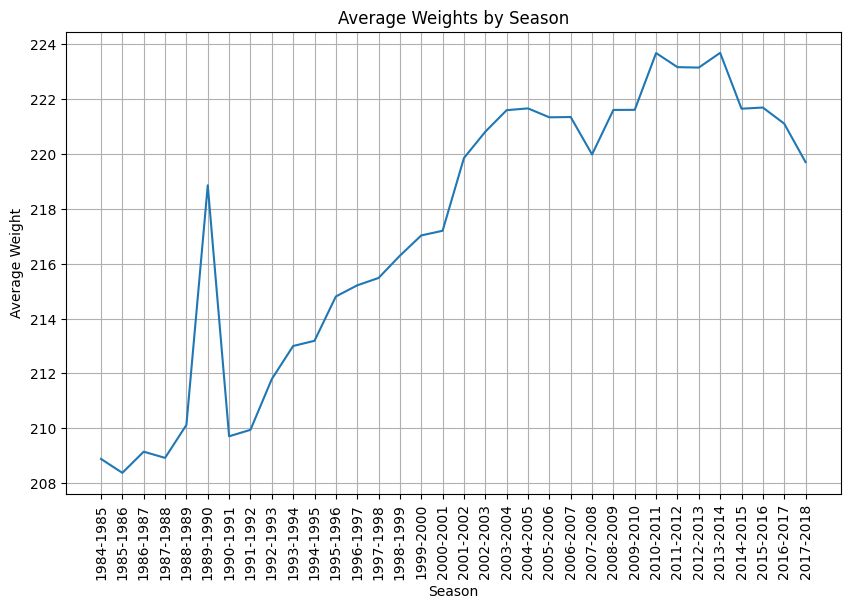

In [489]:
df_merged['weight'] = df_merged['weight'].str[:-2].astype(float) # Change type to float

average_weight_dict = {}

for season in unique_season:
    people_with_this_job = df_merged[df_merged['season_start'] == season]
    average_weight_dict[season] = people_with_this_job['weight'].mean()

sorted_keys = sorted(average_weight_dict.keys())
sorted_values = [average_weight_dict[key] for key in sorted_keys]

formatted_years = [f"{year}-{year+1}" for year in sorted_keys]

plt.figure(figsize=(10, 6))
plt.plot(formatted_years, sorted_values)
plt.xticks(ticks=formatted_years, labels=formatted_years, rotation=90)
plt.xlabel('Season')
plt.ylabel('Average Weight')
plt.title('Average Weights by Season')
plt.grid(True)
plt.show()

Average weight increases over time.

Question 3 Solution

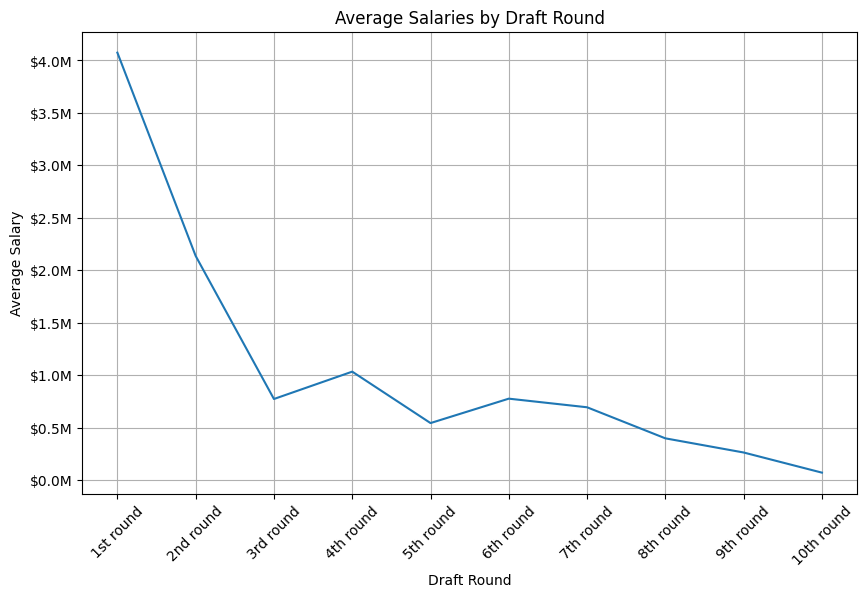

In [490]:
df_merged['draft_round'] = pd.to_numeric(df_merged['draft_round'].astype(str).str.extract('(\d+)')[0], errors='coerce') # Extract numerical parts
df_merged.dropna(subset=['draft_round', 'salary'], inplace=True)
df_merged['draft_round'] = df_merged['draft_round'].astype(float)

unique_draft_round = df_merged['draft_round'].unique()

average_salary_dict = dict()

for unique_round in unique_draft_round:
    people_with_this_round = df_merged[df_merged['draft_round'] == unique_round]
    average_salary_dict[unique_round] = people_with_this_round['salary'].mean()

sorted_keys = sorted(average_salary_dict.keys())
sorted_values = [average_salary_dict[key] for key in sorted_keys]

plt.figure(figsize=(10, 6))
plt.plot(sorted_keys, sorted_values)

x_labels = [f"{int(x):d}{'th' if 10 <= int(x) % 100 <= 20 else {1: 'st', 2: 'nd', 3: 'rd'}.get(int(x) % 10, 'th')} round" for x in sorted_keys]
plt.xticks(sorted_keys, x_labels, rotation=45)

formatter = ticker.FuncFormatter(lambda x, pos: f"${x/1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Draft Round')
plt.ylabel('Average Salary')
plt.title('Average Salaries by Draft Round')
plt.grid(True)


Players with lower draft picks seem to get more salaries.

Question 4 Solutions: 

/var/folders/wn/tnd09k0169g5qz2dj0dgd2zw0000gn/T/ipykernel_70215/638486446.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_salary_per_bucket = df_merged.groupby('height_bucket')['salary'].mean()


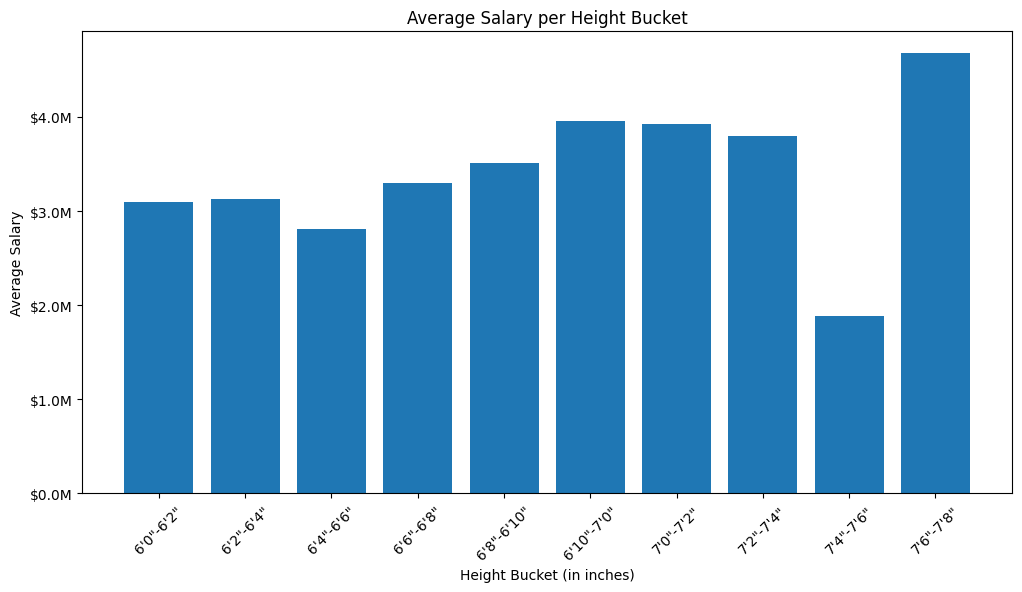

In [491]:
df_merged['height_in_inches'] = df_merged['height'].apply(feet_inches_to_inches)

bins = np.arange(72, df_merged['height_in_inches'].max()+2, 2) # Start, stop and step
labels = [f"{i//12}'{i%12}\"-{(i+2)//12}'{(i+2)%12}\"" for i in bins[:-1]]

df_merged['height_bucket'] = pd.cut(df_merged['height_in_inches'], bins=bins, labels=labels, right=False)

average_salary_per_bucket = df_merged.groupby('height_bucket')['salary'].mean()

plt.figure(figsize=(12, 6))
plt.bar(average_salary_per_bucket.index, average_salary_per_bucket.values)

formatter = ticker.FuncFormatter(lambda x, pos: f"${x/1e6:.1f}M")
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Height Bucket (in inches)')
plt.ylabel('Average Salary')
plt.title('Average Salary per Height Bucket')
plt.xticks(rotation=45)
plt.show()

Players who have larger heights seem to have higher average salaries.

Question 5 Solution

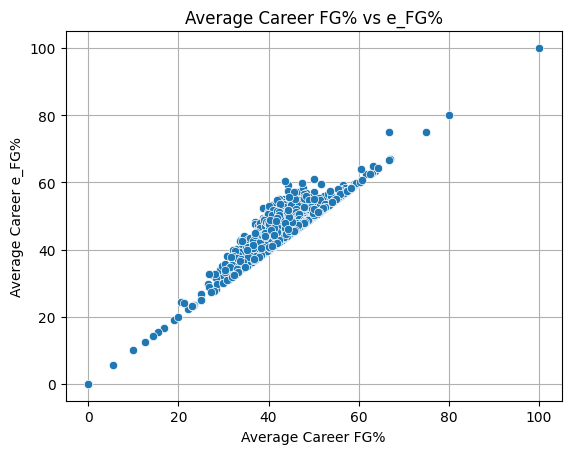

In [492]:
df_merged['career_FG%'] = pd.to_numeric(df_merged['career_FG%'], errors='coerce')
df_merged['career_eFG%'] = pd.to_numeric(df_merged['career_eFG%'], errors='coerce')

grouped_df = df_merged.groupby('player_id').agg({'career_FG%': 'mean', 'career_eFG%': 'mean'}).reset_index()

plt.scatter(grouped_df['career_FG%'], grouped_df['career_eFG%'], edgecolors='white', linewidths=0.5, zorder=2)
plt.xlabel('Average Career FG%')
plt.ylabel('Average Career e_FG%')
plt.title('Average Career FG% vs e_FG%')
plt.grid(True)
plt.show()

Something weird: there is a player that has more than 100% e_FG%.

Question 6 Solution

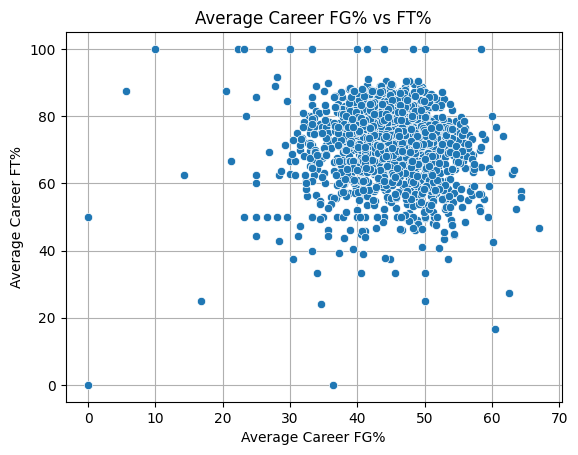

In [493]:
df_merged['career_FT%'] = pd.to_numeric(df_merged['career_FT%'], errors='coerce')

grouped_df = df_merged.groupby('player_id').agg({'career_FG%': 'mean', 'career_FT%': 'mean'}).reset_index()

plt.scatter(grouped_df['career_FG%'], grouped_df['career_FT%'], edgecolors='white', linewidths=0.5, zorder=2)
plt.xlabel('Average Career FG%')
plt.ylabel('Average Career FT%')
plt.title('Average Career FG% vs FT%')
plt.grid(True)
plt.show()